# Conceptos de estadística

## Tipos de datos

In [1]:
import numpy as np
from datetime import date

In [2]:
type('1')
type(0)
type(1.1)
type(1.1+1)
type('1.1'+'1')

str

In [3]:
1 + 1
1-1
1/2
3%2
3**2
3*2

6

In [4]:
1 > 2
1 < 2
(1>2) & (1<2)
(1>2) | (1<2)

True

In [5]:
list1 = ['1',0,[1,2]]
list1[2][1]

2

## Experimento de Bernoulli
* **Distribución binomial**, suma de n elementos independientes de Bernouli
* **Distribución de probabilidad**, algunos valores van a tener mayor probabilidad que otros dentro de la distribución 

In [178]:
universo = ['cara', 'sello']
p_cara = 1/2

In [179]:
universo

['cara', 'sello']

In [180]:
p_cara

0.5

In [184]:
from scipy.stats import bernoulli
bernoulli.rvs(p=p_cara)

0

In [83]:
universo[bernoulli.rvs(p=p_cara)]

'cara'

In [192]:
bernoulli.rvs(p=p_cara, size=10)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [202]:
sum(bernoulli.rvs(p=p_cara, size=10))

5

In [210]:
from scipy.stats import binom
binom.rvs(p=p_cara, n=10, size=100)

array([2, 7, 8, 3, 7, 4, 6, 6, 6, 4, 3, 6, 5, 4, 7, 4, 5, 3, 5, 3, 7, 6,
       5, 5, 5, 4, 4, 6, 7, 6, 9, 5, 6, 5, 8, 6, 6, 5, 5, 4, 5, 4, 6, 9,
       4, 4, 6, 6, 4, 4, 5, 4, 3, 7, 6, 3, 7, 5, 8, 4, 6, 6, 4, 5, 7, 9,
       5, 6, 3, 2, 5, 5, 9, 5, 4, 6, 3, 5, 5, 6, 6, 6, 8, 8, 3, 5, 5, 9,
       5, 5, 3, 3, 6, 5, 4, 5, 6, 6, 5, 4])

In [211]:
import pandas as pd
pd.Series(binom.rvs(p=p_cara, n =10, size=100)).value_counts()

7     22
5     20
4     20
6     17
3     11
2      5
8      4
10     1
dtype: int64

## Medidas de tendencia central

In [94]:
import numpy as pd
import pandas as pd
import scipy
import scipy.stats

In [96]:
df = pd.read_csv('../data/bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [105]:
y = df['bicis-compartidas'].values
y

array([182, 138, 134, ..., 337, 224, 139], dtype=int64)

In [106]:
np.min(y)

0

In [107]:
# Remover 0s
y = np.where(y==0,1,y)
y

array([182, 138, 134, ..., 337, 224, 139], dtype=int64)

In [108]:
np.min(y)

1

In [109]:
np.max(y)

7860

### Promedio
sum(yi)/n

In [111]:
np.mean(y)

1143.1016997817849

In [112]:
np.sum(y)/len(y)

1143.1016997817849

### Media geometrica

In [113]:
scipy.stats.mstats.hmean(y)

241.65180305136826

### Media

In [114]:
np.median(y)

844.0

### Moda
Valor de y con la maxima frecuencia

In [118]:
moda = np.nan
valores, conteo_valores = np.unique(y, return_counts=True)
pos = np.argmax(conteo_valores)
moda = valores[pos]
moda

46

## Medidas de dispersión
Desviación estándar

In [119]:
np.std(y)

1085.0768508213835

## Revisiones

In [126]:
y_alterado = y.copy()
y_alterado[y_alterado == max(y_alterado)] = 10000000

In [127]:
print(np.mean(y))
print(np.mean(y_alterado))

1143.1016997817849
1716.9009417709888


In [128]:
print(np.median(y))
print(np.median(y_alterado))

844.0
844.0


## Análisis con Pandas

In [129]:
df['bicis-compartidas'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [130]:
df['bicis-compartidas'].mode()

0    46
dtype: int64

In [131]:
df['bicis-compartidas'].notna().sum()

17414

In [133]:
df['bicis-compartidas'].shape

(17414,)

In [134]:
df['bicis-compartidas'].std()

1085.1080679362178

In [135]:
df['bicis-compartidas'].value_counts().keys()[0]

46

## Estadística descriptiva (Histogramas)

In [136]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [137]:
df = pd.read_csv('../data/bicicletas-compartidas.csv')
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

### Frecuencias categoricas

In [143]:
# Variable categorica
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-'+str(int(x)))
ycat.head()

0    Cat-3
1    Cat-3
2    Cat-3
3    Cat-3
4    Cat-3
Name: cuartil-ano, dtype: object

In [144]:
valores, conteo_freq = np.unique(ycat, return_counts=True)
valores, conteo_freq

(array(['Cat-0', 'Cat-1', 'Cat-2', 'Cat-3'], dtype=object),
 array([4394, 4387, 4303, 4330], dtype=int64))

In [146]:
tabla_frecuencias = dict(zip(valores,conteo_freq))
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [148]:
# Variable numerica
ynum = df['viento'].copy()
np.min(y), np.max(ynum)

(1, 56.5)

In [152]:
np.percentile(ynum, q=100)

56.5

In [151]:
np.percentile(ynum, q=0)

0.0

In [153]:
np.percentile(ynum, q=50)

15.0

In [154]:
np.median(ynum)

15.0

In [155]:
# Cuartiles
valores = [0,25,50,75,100]
np.percentile(ynum, q=valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [156]:
# Quimtiles
valores = [0,20,40,60,80,100]
np.percentile(ynum, q=valores)

array([ 0. ,  9. , 13. , 17. , 22. , 56.5])

In [157]:
# Deciles
valores = list(range(0,110,10))
np.percentile(ynum, q=valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [159]:
y = df['bicis-compartidas']
y.describe()

pandas.core.series.Series

In [160]:
# Outliers: Valores fuera de rango
# RI = Rango intercuartilico
Q1 = np.percentile(ynum, q=25)
Q3 = np.percentile(ynum, q=75)

RI = Q3-Q1

lim_inf = Q1-1.5*RI
lim_sup = Q3+1.5*RI
[lim_inf,lim_sup]

[-5.75, 36.25]

In [161]:
# Histogramas
import matplotlib.pyplot as plt
%matplotlib inline

(array([8.274e+03, 4.416e+03, 2.355e+03, 1.241e+03, 5.610e+02, 4.710e+02,
        8.800e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([   0.,  786., 1572., 2358., 3144., 3930., 4716., 5502., 6288.,
        7074., 7860.]),
 <a list of 10 Patch objects>)

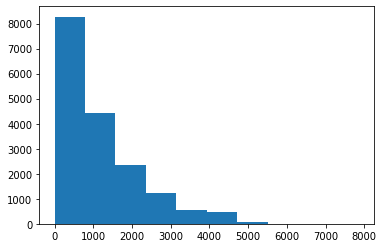

In [162]:
plt.hist(y)

## Visualización de datos

In [ ]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('../data/bicicletas-compartidas.csv')

### Variables Categoricas

In [166]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [167]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil-'+str(int(x)))
y

0        cuartil-3
1        cuartil-3
2        cuartil-3
3        cuartil-3
4        cuartil-3
           ...    
17409    cuartil-3
17410    cuartil-3
17411    cuartil-3
17412    cuartil-3
17413    cuartil-3
Name: cuartil-ano, Length: 17414, dtype: object

Text(0, 0.5, 'Fecuencia')

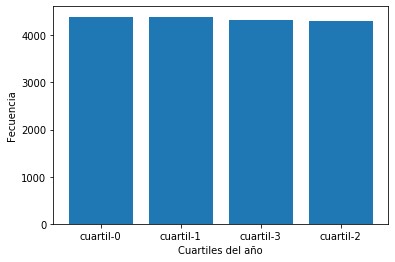

In [169]:
fix, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Fecuencia')

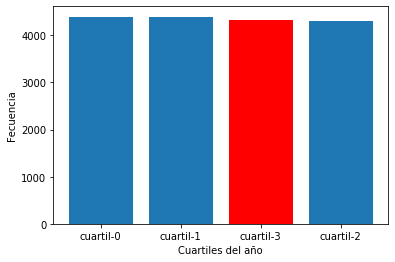

In [172]:
fix, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Fecuencia')
ax.patches[2].set_facecolor('red')

Text(0.5, 1.0, 'Diagrama de pie')

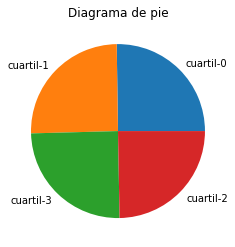

In [175]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels=y.value_counts().index)
ax.set_title('Diagrama de pie')

## Númericas

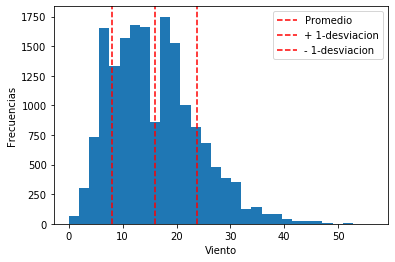

In [181]:
y = df['viento']
fig, ax = plt.subplots()
ax.hist(y, bins=30)
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')
plt.axvline(np.mean(y), c='r', linestyle='--', label='Promedio')
plt.axvline( np.mean(y) + np.std(y), c='r', linestyle='--', label='+ 1-desviacion')
plt.axvline( np.mean(y) - np.std(y), c='r', linestyle='--', label='- 1-desviacion')
ax.legend()

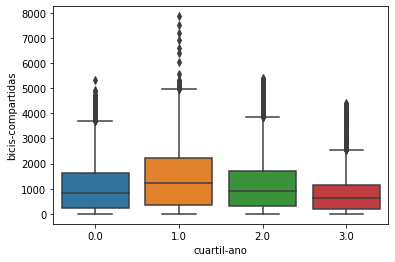

In [187]:
y = df['bicis-compartidas']
fig, ax = plt.subplots()
sns.boxplot( x =  'cuartil-ano', y = 'bicis-compartidas', data = df)

In [1]:
fig, ax = plt.subplots()
ax.scatter(df['viento'], df['bicis-compartidas'], alpha = 0.03)
ax.set_title('Distribución conjunta de viento y bicis compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-compartidas')

NameError: name 'plt' is not defined